# A Third-party Analysis of the AASL Standards

Jinren Yuan

This section contains the analysis of **educators**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud

In [2]:
df_e = pd.read_csv("data/AASL Standards Survey - Educators - Sheet.csv")
df_e.shape

(49, 227)

In [3]:
df_e.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,"Which of the following positions most closely reflects your job role? If you are retired, please select the option that is closest to the job role you had at retirement.",...,Unnamed: 217,What is the primary language spoken in your MLS program?,Unnamed: 219,"Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?",Which of the following categories best describes your race or ethnicity?,Unnamed: 222,Which of the following categories best describes your employment status?,Unnamed: 224,"Which of the following categories best describes your total household income last year, before taxes, including everyone in your household?",Is there anything else you would like to add?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,...,Another language (please specify),Response,Other (please specify),Response,Response,Other (please specify),Response,Other (please specify),Response,Open-Ended Response
1,1.184747e+11,453683444.0,2023-11-20 12:08:25,2023-11-20 12:29:42,NaN,NaN,NaN,NaN,NaN,Full-time educator of school librarians,...,NaN,English,NaN,No,White,NaN,Employed full-time,NaN,Prefer not to answer,*Affordable cost of the next iteration of stan...
2,1.184746e+11,453683444.0,2023-11-20 10:07:16,2023-11-20 10:07:30,NaN,NaN,NaN,NaN,NaN,Full-time educator of school librarians,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.184736e+11,453683444.0,2023-11-18 18:36:13,2023-11-18 19:13:57,NaN,NaN,NaN,NaN,NaN,Adjunct instructor of school librarians,...,NaN,English,NaN,No,White,NaN,Employed part-time,NaN,Prefer not to answer,Our AASL standards are among the best curricu...
4,1.184735e+11,453683444.0,2023-11-18 10:47:26,2023-11-18 11:01:42,NaN,NaN,NaN,NaN,NaN,Full-time educator of school librarians,...,NaN,English,NaN,Prefer not to answer,Prefer not to answer,NaN,Employed full-time,NaN,Prefer not to answer,It seems like you are looking for problems wit...


In [4]:
df_e.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'Which of the following positions most closely reflects your job role? If you are retired, please select the option that is closest to the job role you had at retirement.',
       ...
       'Unnamed: 217',
       'What is the primary language spoken in your MLS program?',
       'Unnamed: 219',
       'Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?',
       'Which of the following categories best describes your race or ethnicity?',
       'Unnamed: 222',
       'Which of the following categories best describes your employment status?',
       'Unnamed: 224',
       'Which of the following categories best describes your total household income last year, before taxes, including everyone in your household?',
       'Is there anything else you would like to add?'],


In [5]:
# drop irrelavent ID and date fields
df_e = df_e.drop(columns=['Respondent ID', 'Collector ID', 'Start Date', 'End Date'])

# drop fields that contain only missing values (NaN)
df_e = df_e.dropna(axis=1, how='all')
df_e.head()

,"Which of the following positions most closely reflects your job role? If you are retired, please select the option that is closest to the job role you had at retirement.",Which of the following best describes the school(s) you work in? Please select all that apply.,Unnamed: 11,Unnamed: 12,Which of the following best describes your work environment? Please select all that apply.,Unnamed: 14,Unnamed: 15,Unnamed: 16,Is your MLS program recognized by AASL and accredited by ALA and the Council for the Accreditation of Educator Preparation (CAEP)?,"Below is a list of organizations and associations that provide programs, standards, and guidelines. Please select the ones which are useful to you in your work as a school library educator. Please select all that apply.",...,Unnamed: 217,What is the primary language spoken in your MLS program?,Unnamed: 219,"Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?",Which of the following categories best describes your race or ethnicity?,Unnamed: 222,Which of the following categories best describes your employment status?,Unnamed: 224,"Which of the following categories best describes your total household income last year, before taxes, including everyone in your household?",Is there anything else you would like to add?
0,Response,Public / State university or college,Private university or college,Other (please specify),In-person program,Online program,Hybrid program,Other (please specify),Response,None of the above,...,Another language (please specify),Response,Other (please specify),Response,Response,Other (please specify),Response,Other (please specify),Response,Open-Ended Response
1,Full-time educator of school librarians,Public / State university or college,NaN,NaN,NaN,NaN,Hybrid program,NaN,"Yes, the program is approved.",NaN,...,NaN,English,NaN,No,White,NaN,Employed full-time,NaN,Prefer not to answer,*Affordable cost of the next iteration of stan...
2,Full-time educator of school librarians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adjunct instructor of school librarians,Public / State university or college,NaN,NaN,NaN,Online program,NaN,NaN,"Yes, the program is approved.",NaN,...,NaN,English,NaN,No,White,NaN,Employed part-time,NaN,Prefer not to answer,Our AASL standards are among the best curricu...
4,Full-time educator of school librarians,Public / State university or college,NaN,NaN,NaN,Online program,NaN,NaN,"Yes, the program is approved.",NaN,...,NaN,English,NaN,Prefer not to answer,Prefer not to answer,NaN,Employed full-time,NaN,Prefer not to answer,It seems like you are looking for problems wit...


In [6]:
# Drop Q2 - Q7
df_e = df_e.drop(df_e.columns[1:33], axis=1)

In [7]:
df_e.head()

,"Which of the following positions most closely reflects your job role? If you are retired, please select the option that is closest to the job role you had at retirement.","Before today, were you aware that AASL revised and published the National School Library Standards for Learners, School Librarians, and School Libraries (2018)? AASL Standards Book Cover","Have you purchased the National School Library Standards for Learners, School Librarians, and School Libraries book publication?",Do you currently use the National School Library Standards in your course development?,Unnamed: 45,What made you choose to use standards other than the AASL Standards in your course development? Select all that apply.,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,...,Unnamed: 217,What is the primary language spoken in your MLS program?,Unnamed: 219,"Are you of Hispanic or Latino background – such as Mexican, Puerto Rican, Cuban, or another Latin American background?",Which of the following categories best describes your race or ethnicity?,Unnamed: 222,Which of the following categories best describes your employment status?,Unnamed: 224,"Which of the following categories best describes your total household income last year, before taxes, including everyone in your household?",Is there anything else you would like to add?
0,Response,Response,Response,Response,"No, I use other standards in developing course...",I am expected to use these standards by my uni...,I am required by my state department of educat...,These standards feel more accessible to me.,I have prior experience with these standards.,These standards are broken down by grade-level.,...,Another language (please specify),Response,Other (please specify),Response,Response,Other (please specify),Response,Other (please specify),Response,Open-Ended Response
1,Full-time educator of school librarians,Yes,"Yes, I purchased the book","Yes, I use them in conjunction with other stan...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,English,NaN,No,White,NaN,Employed full-time,NaN,Prefer not to answer,*Affordable cost of the next iteration of stan...
2,Full-time educator of school librarians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adjunct instructor of school librarians,Yes,"Yes, it was purchased for me by my university/...","Yes, I use them in conjunction with other stan...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,English,NaN,No,White,NaN,Employed part-time,NaN,Prefer not to answer,Our AASL standards are among the best curricu...
4,Full-time educator of school librarians,Yes,"Yes, I purchased the book","Yes, I use them exclusively.",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,English,NaN,Prefer not to answer,Prefer not to answer,NaN,Employed full-time,NaN,Prefer not to answer,It seems like you are looking for problems wit...


In [8]:
df_e.shape

(49, 186)

In [9]:
# Drop from Q42
df_e = df_e.drop(df_e.columns[157:], axis=1)

In [10]:
for col in df_e.columns:
    print(col)

Which of the following positions most closely reflects your job role? If you are retired, please select the option that is closest to the job role you had at retirement.
Before today, were you aware that AASL revised and published the National School Library Standards for Learners, School Librarians, and School Libraries (2018)? AASL Standards Book Cover
Have you purchased the National School Library Standards for Learners, School Librarians, and School Libraries book publication?
Do you currently use the National School Library Standards in your course development?
Unnamed: 45
What made you choose to use standards other than the AASL Standards in your course development? Select all that apply.
Unnamed: 47
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
What other standards are you using in addition to the AASL Standards in your course development?
How are you accessing the National School Library Standards? Please select all that apply.
Unnamed: 54
Unnamed: 55
Unnamed: 56
Unnamed: 57


In [11]:
df_e.shape

(49, 157)

In [12]:
df_e.head()

,"Which of the following positions most closely reflects your job role? If you are retired, please select the option that is closest to the job role you had at retirement.","Before today, were you aware that AASL revised and published the National School Library Standards for Learners, School Librarians, and School Libraries (2018)? AASL Standards Book Cover","Have you purchased the National School Library Standards for Learners, School Librarians, and School Libraries book publication?",Do you currently use the National School Library Standards in your course development?,Unnamed: 45,What made you choose to use standards other than the AASL Standards in your course development? Select all that apply.,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,...,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,"Overall, how would you rate AASL’s initiative and efforts since the launch of the National School Library Standards and available supporting resources?",For what reason did you give that rating? Please explain your thinking..1,"How supported do you feel by AASL in integrating the National School Library Standards for Learners, School Librarians, and School Libraries book into your program’s curriculum?",What additional supports would have been helpful to you when you first encountered the AASL Standards?
0,Response,Response,Response,Response,"No, I use other standards in developing course...",I am expected to use these standards by my uni...,I am required by my state department of educat...,These standards feel more accessible to me.,I have prior experience with these standards.,These standards are broken down by grade-level.,...,Expand personal learning by leading trainings ...,"Attend workshops at the local, state, or natio...",Attend webinars and online learning events,Access my personal learning networks,Access my social media networks,Other (please specify),Response,Open-Ended Response,Response,Open-Ended Response
1,Full-time educator of school librarians,Yes,"Yes, I purchased the book","Yes, I use them in conjunction with other stan...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Attend workshops at the local, state, or natio...",NaN,Access my personal learning networks,Access my social media networks,NaN,Excellent,NaN,Very well,NaN
2,Full-time educator of school librarians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adjunct instructor of school librarians,Yes,"Yes, it was purchased for me by my university/...","Yes, I use them in conjunction with other stan...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Fair,Efforts often fail to reach school librarians ...,Not very well,"Simple, accessible guidelines. Simple overv..."
4,Full-time educator of school librarians,Yes,"Yes, I purchased the book","Yes, I use them exclusively.",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Attend workshops at the local, state, or natio...",NaN,NaN,Access my social media networks,NaN,Excellent,NaN,Very well,NaN


In [13]:
df_e.rename(columns={df_e.columns[0]: 'q1_job', # Q1
                     df_e.columns[1]: 'q8_aware', # Q8
                     df_e.columns[2]: 'q9_purchase', # Q9

                     df_e.columns[3]: 'q10_use_in_course', # Q10
                     df_e.columns[4]: 'q10_other_standard',

                     df_e.columns[5]: 'q11_by_collage', # Q11
                     df_e.columns[6]: 'q11_by_state',
                     df_e.columns[7]: 'q11_accessible',
                     df_e.columns[8]: 'q11_experience',
                     df_e.columns[9]: 'q11_grade_level',
                     df_e.columns[10]: 'q11_others',

                     df_e.columns[11]: 'q12_other_standards', # Q12 This question comes from Q10, they use the AASL standards in conjunction with other standards.

                     df_e.columns[12]: 'q13_own', # Q13
                     df_e.columns[13]: 'q13_borrow',
                     df_e.columns[14]: 'q13_collage_library',
                     df_e.columns[15]: 'q13_plan_to_purchase',
                     df_e.columns[16]: 'q13_web_portal',
                     df_e.columns[17]: 'q13_poster',
                     df_e.columns[18]: 'q13_others',

                     df_e.columns[19]: 'q14_required_or_not', # Q14
                     df_e.columns[20]: 'q15_not_required_reason', # Q15

                     df_e.columns[21]: 'q16_full_cost', # Q16
                     df_e.columns[22]: 'q16_discount',
                     df_e.columns[23]: 'q16_provide_copies',
                     df_e.columns[24]: 'q16_loan_copies',
                     df_e.columns[25]: 'q16_collage_library',
                     df_e.columns[26]: 'q16_web_portal',
                     df_e.columns[27]: 'q16_poster',
                     df_e.columns[28]: 'q16_others'}
                     , inplace=True)

In [14]:
df_e.rename(columns={df_e.columns[29]: 'q17_how_familiar', # Q17
                     df_e.columns[30]: 'q18_rate', # Q18
                     df_e.columns[31]: 'q19_poor_rating_reason', # Q19

                     df_e.columns[32]: 'q20_valuable', # Q20
                     df_e.columns[33]: 'q20_relevant',
                     df_e.columns[34]: 'q20_practical',
                     df_e.columns[35]: 'q20_useful',
                     df_e.columns[36]: 'q20_easy_to_use',
                     df_e.columns[37]: 'q20_easy_to_understand',
                     df_e.columns[38]: 'q20_well_written',
                     df_e.columns[39]: 'q20_nicely_designed',
                     df_e.columns[40]: 'q20_well_organized',
                     df_e.columns[41]: 'q20_ADA_accessible',

                     df_e.columns[42]: 'q21_like', # Q21
                     df_e.columns[43]: 'q22_dislike', # Q22

                     df_e.columns[44]: 'q23_easy_to_explain', # Q23
                     df_e.columns[45]: 'q23_achievable',
                     df_e.columns[46]: 'q23_advocacy_tool',
                     df_e.columns[47]: 'q23_culture_change',
                     df_e.columns[48]: 'q23_collaboration',
                     df_e.columns[49]: 'q23_easy_to_implement',

                     df_e.columns[50]: 'q24_library_community', # Q24
                     df_e.columns[51]: 'q24_education_community',
                     df_e.columns[52]: 'q24_develop_and_administer',
                     df_e.columns[53]: 'q24_supervisor',
                     df_e.columns[54]: 'q24_colleagues',
                     df_e.columns[55]: 'q24_college',
                     df_e.columns[56]: 'q24_professionalism'}
                     , inplace=True)

In [15]:
df_e.rename(columns={df_e.columns[57]: 'q25_unique_and_essential', # Q25
                     df_e.columns[58]: 'q25_effective',
                     df_e.columns[59]: 'q25_prepared',
                     df_e.columns[60]: 'q25_reading',
                     df_e.columns[61]: 'q25_intellectual_freedom',
                     df_e.columns[62]: 'q25_equitably_available',

                     df_e.columns[63]: 'q26_refer_to_standards', # Q26

                     df_e.columns[64]: 'q27_p1_1', # Q27
                     df_e.columns[65]: 'q27_p1_2',
                     df_e.columns[66]: 'q27_p1_3',
                     df_e.columns[67]: 'q27_p1_4',
                     df_e.columns[68]: 'q27_p1_5',
                     df_e.columns[69]: 'q27_p2_1',
                     df_e.columns[70]: 'q27_p2_2',
                     df_e.columns[71]: 'q27_p2_3',
                     df_e.columns[72]: 'q27_p3_1',
                     df_e.columns[73]: 'q27_p3_2',
                     df_e.columns[74]: 'q27_p3_3',
                     df_e.columns[75]: 'q27_p3_4',
                     df_e.columns[76]: 'q27_p3_5',
                     df_e.columns[77]: 'q27_p3_6',
                     df_e.columns[78]: 'q27_p4',
                     df_e.columns[79]: 'q27_app_1',
                     df_e.columns[80]: 'q27_app_2',
                     df_e.columns[81]: 'q27_app_3',
                     df_e.columns[82]: 'q27_app_4',
                     df_e.columns[83]: 'q27_app_5'}
                     , inplace=True)

In [16]:
df_e.rename(columns={df_e.columns[84]: 'q28_language', # Q28
                     df_e.columns[85]: 'q28_structure',
                     df_e.columns[86]: 'q28_interdependent_nature',
                     df_e.columns[87]: 'q28_key_commitments',
                     df_e.columns[88]: 'q28_interrelated_aspects',
                     df_e.columns[89]: 'q28_continuum',
                     df_e.columns[90]: 'q28_context',

                     df_e.columns[91]: 'q29_for_learners', # Q29
                     df_e.columns[92]: 'q29_for_school_librarians',
                     df_e.columns[93]: 'q29_for_school_libraries',

                     df_e.columns[94]: 'q30_inquire', # Q30
                     df_e.columns[95]: 'q30_include',
                     df_e.columns[96]: 'q30_collaborate',
                     df_e.columns[97]: 'q30_curate',
                     df_e.columns[98]: 'q30_explore',
                     df_e.columns[99]: 'q30_engage',

                     df_e.columns[100]: 'q31_think', # Q31
                     df_e.columns[101]: 'q31_create',
                     df_e.columns[102]: 'q31_share',
                     df_e.columns[103]: 'q31_grow',

                     df_e.columns[104]: 'q32_lesson_preparation_and_assessment', # Q32
                     df_e.columns[105]: 'q32_librarian_evaluation',
                     df_e.columns[106]: 'q32_with_other_educators',
                     df_e.columns[107]: 'q32_with_other_libraries',
                     df_e.columns[108]: 'q32_demonstrate_success',
                     df_e.columns[109]: 'q32_guide_instructional_priorities',
                     df_e.columns[110]: 'q32_develop_curriculum',
                     df_e.columns[111]: 'q32_shape_school_library',
                     df_e.columns[112]: 'q32_meet_national_standards',
                     df_e.columns[113]: 'q32_advocate_for_school_library',
                     df_e.columns[114]: 'q32_advocate_for_learners',
                     df_e.columns[115]: 'q32_increase_understanding_of_school_librarian',
                     df_e.columns[116]: 'q32_educate_preservice_librarians',
                     df_e.columns[117]: 'q32_legitimize_profession',
                     df_e.columns[118]: 'q32_others'}
                     , inplace=True)

In [17]:
df_e.rename(columns={df_e.columns[119]: 'q33_anything_new', # Q33
                     df_e.columns[120]: 'q34_how_to_use', # Q34

                     df_e.columns[121]: 'q35_implement_standards', # Q35
                     df_e.columns[122]: 'q35_adapt_standards',
                     df_e.columns[123]: 'q35_translate_standards',
                     df_e.columns[124]: 'q35_success_for_learners',
                     df_e.columns[125]: 'q35_success_for_school_librarians',
                     df_e.columns[126]: 'q35_success_for_school_libraries',
                     df_e.columns[127]: 'q35_access_standards',
                     df_e.columns[128]: 'q35_demonstrate_alignment',
                     df_e.columns[129]: 'q35_lack_support',
                     df_e.columns[130]: 'q35_lack_time_to_study',
                     df_e.columns[131]: 'q35_lack_time_for_collaboration',
                     df_e.columns[132]: 'q35_others',

                     df_e.columns[133]: 'q36_invest_time_to_study', # Q36
                     df_e.columns[134]: 'q36_teach_colleagues',
                     df_e.columns[135]: 'q36_advocate_the_importance',
                     df_e.columns[136]: 'q36_incorporate_standards',
                     df_e.columns[137]: 'q36_refine_new_courses',
                     df_e.columns[138]: 'q36_develop_tools',
                     df_e.columns[139]: 'q36_professional_learning',
                     df_e.columns[140]: 'q36_others',

                     df_e.columns[141]: 'q37_knowledge_quest', # Q37
                     df_e.columns[142]: 'q37_national_conference',
                     df_e.columns[143]: 'q37_e_learning',
                     df_e.columns[144]: 'q37_publications',
                     df_e.columns[145]: 'q37_association_training',
                     df_e.columns[146]: 'q37_self_training',
                     df_e.columns[147]: 'q37_leading_trainings',
                     df_e.columns[148]: 'q37_attend_workshops',
                     df_e.columns[149]: 'q37_attend_webinars',
                     df_e.columns[150]: 'q37_personal_learning_networks',
                     df_e.columns[151]: 'q37_social_media_networks',
                     df_e.columns[152]: 'q37_others'}
                     , inplace=True)

In [18]:
df_e.rename(columns={df_e.columns[153]: 'q38_rate_support_materials', # Q38
                     df_e.columns[154]: 'q39_poor_support_reason', # Q39
                     df_e.columns[155]: 'q40_how_supported', # Q40
                     df_e.columns[156]: 'q41_additional_support'} # Q41
                     , inplace=True)

In [19]:
df_e = df_e.iloc[1:].reset_index(drop=True)

In [20]:
df_e.head()

,q1_job,q8_aware,q9_purchase,q10_use_in_course,q10_other_standard,q11_by_collage,q11_by_state,q11_accessible,q11_experience,q11_grade_level,...,q37_leading_trainings,q37_attend_workshops,q37_attend_webinars,q37_personal_learning_networks,q37_social_media_networks,q37_others,q38_rate_support_materials,q39_poor_support_reason,q40_how_supported,q41_additional_support
0,Full-time educator of school librarians,Yes,"Yes, I purchased the book","Yes, I use them in conjunction with other stan...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Attend workshops at the local, state, or natio...",NaN,Access my personal learning networks,Access my social media networks,NaN,Excellent,NaN,Very well,NaN
1,Full-time educator of school librarians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Adjunct instructor of school librarians,Yes,"Yes, it was purchased for me by my university/...","Yes, I use them in conjunction with other stan...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Fair,Efforts often fail to reach school librarians ...,Not very well,"Simple, accessible guidelines. Simple overv..."
3,Full-time educator of school librarians,Yes,"Yes, I purchased the book","Yes, I use them exclusively.",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Attend workshops at the local, state, or natio...",NaN,NaN,Access my social media networks,NaN,Excellent,NaN,Very well,NaN
4,Full-time educator of school librarians,Yes,"Yes, it was purchased for me by my university/...","Yes, I use them in conjunction with other stan...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Attend workshops at the local, state, or natio...",Attend webinars and online learning events,NaN,NaN,NaN,Good,NaN,Somewhat,additional training on implementation. virtual...


In [21]:
df_e = df_e.drop(index=8).reset_index(drop=True)

In [22]:
df_e.shape

(47, 157)

In [23]:
# Q20 - Replace extreme values with corresponding integers
df_e_q20 = df_e.iloc[:, [0] + list(range(32, 42))].dropna(
    subset=df_e.columns[32:42], how='all')

df_e_q20.iloc[:, 1:11] = df_e_q20.iloc[:, 1:11].replace({
        'Describes completely': 6,
        '2': 5,
        '3': 4,
        '4': 3,
        '5': 2,
        'Does not describe at all': 0
    }).astype(int)

In [24]:
# Q23 - Replace extreme values with corresponding integers
df_e_q23 = df_e.iloc[:, [0] + list(range(44, 50))].dropna(
    subset=df_e.columns[44:50], how='all')

df_e_q23.iloc[:, 1:7] = df_e_q23.iloc[:, 1:7].replace({
        'Describes completely': 6,
        '2': 5,
        '3': 4,
        '4': 3,
        '5': 2,
        'Does not describe at all': 0
    }).astype(int)

In [25]:
# Q24 - Two-extremes rescale
df_e_q24 = df_e.iloc[:, [0] + list(range(50, 57))].dropna(
    subset=df_e.columns[50:57], how='all')

df_e_q24.iloc[:, 1:8] = df_e_q24.iloc[:, 1:8].replace({
    "Strongly agree": 2,
    "Somewhat agree": 1,
    "Somewhat disagree": -1,
    "Strongly disagree": -2
}).astype(int)

In [26]:
# Q25 - Two-extremes rescale
df_e_q25 = df_e.iloc[:, [0] + list(range(57, 63))].dropna(
    subset=df_e.columns[57:63], how='all')

df_e_q25.iloc[:, 1:7] = df_e_q25.iloc[:, 1:7].replace({
    "Strongly agree": 2,
    "Somewhat agree": 1,
    "Somewhat disagree": -1,
    "Strongly disagree": -2
}).astype(int)

In [27]:
# Q28 - Five levels
df_e_q28 = df_e.iloc[:, [0] + list(range(84, 91))].dropna(
    subset=df_e.columns[84:91], how='all')

df_e_q28.iloc[:, 1:8] = df_e_q28.iloc[:, 1:8].replace({
    "Very well": 2,
    "Somewhat": 1,
    "Not sure": 0,
    "Not very well": -1,
    "Not at all": -2
}).astype(int)

In [28]:
# Q29 - Four levels
df_e_q29 = df_e.iloc[:, [0] + list(range(91, 94))].dropna(
    subset=df_e.columns[91:94], how='all')

df_e_q29.iloc[:, 1:4] = df_e_q29.iloc[:, 1:4].replace({
    "All the time": 3,
    "Sometimes": 2,
    "Rarely": 1,
    "Never": 0,
}).astype(int)

In [29]:
# Q30 - Four levels
df_e_q30 = df_e.iloc[:, [0] + list(range(94, 100))].dropna(
    subset=df_e.columns[94:100], how='all')

df_e_q30.iloc[:, 1:7] = df_e_q30.iloc[:, 1:7].replace({
    "All the time": 3,
    "Sometimes": 2,
    "Rarely": 1,
    "Never": 0,
}).astype(int)

In [30]:
# Q31 - Four levels
df_e_q31 = df_e.iloc[:, [0] + list(range(100, 104))].dropna(
    subset=df_e.columns[100:104], how='all')

df_e_q31.iloc[:, 1:5] = df_e_q31.iloc[:, 1:5].replace({
    "All the time": 3,
    "Sometimes": 2,
    "Rarely": 1,
    "Never": 0,
}).astype(int)

In [31]:
# Q32 - Five levels
df_e_q32 = df_e.iloc[:, [0] + list(range(104, 118))].dropna(
    subset=df_e.columns[104:118], how='all')

df_e_q32.iloc[:, 1:15] = df_e_q32.iloc[:, 1:15].replace({
    "Very helpful": 2,
    "Somewhat helpful": 1,
    "Not sure": 0,
    "Not very helpful": -1,
    "Not at all helpful": -2
}).astype(int)

In [32]:
# OneHot encode
df_e.iloc[:, 5:10] = df_e.iloc[:, 5:10].notna().astype(int) # Q11
df_e.iloc[:, 12:18] = df_e.iloc[:, 12:18].notna().astype(int) # Q13
df_e.iloc[:, 21:28] = df_e.iloc[:, 21:28].notna().astype(int) # Q16
df_e.iloc[:, 121:132] = df_e.iloc[:, 121:132].notna().astype(int) # Q35
df_e.iloc[:, 133:140] = df_e.iloc[:, 133:140].notna().astype(int) # Q36
df_e.iloc[:, 141:152] = df_e.iloc[:, 141:152].notna().astype(int) # Q37

## Analysis

### Utilization

`q8`: Before today, were you aware that AASL revised and published the National School Library Standards for Learners, School Librarians, and School Libraries (2018)?

In [33]:
df_e.iloc[:, 1].value_counts()

q8_aware
Yes    40
Name: count, dtype: int64

- All of the 40 answers chose YES here.

`q9`: Have you purchased the National School Library Standards for Learners, School Librarians, and School Libraries book publication?

In [34]:
value_counts = df_e.iloc[:, 2].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
result.sort_values(by='Count', ascending=False)

,Count,Percentage
q9_purchase,,
"Yes, I purchased the book",30,75.0
"Yes, it was purchased for me by my university/college or other organization",8,20.0
No,2,5.0


- Only 2 of them (5%) did not purchased the Standards.

- For those 38 ones purchased the Standards, most of them (79%) were purchased by themselfs, and only 8 of them (21%) were purchased by their organization.

`q10`: Do you currently use the National School Library Standards in your course development?

In [35]:
value_counts = df_e.iloc[:, 3].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
result.sort_values(by='Count', ascending=False)

,Count,Percentage
q10_use_in_course,,
"Yes, I use them in conjunction with other standards.",31,77.5
"Yes, I use them exclusively.",7,17.5
"No, I use other standards in developing course work. (please specify)",2,5.0


In [36]:
df_e_q12 = df_e.iloc[:, 11].dropna().tolist()
df_e_q12

['As listed in the earlier question--state standards, CAEP/AASL preparation standards, etc.',
 'ISTE',
 'School Library Programs: Standards and Guidelines for Texas',
 'State standards, ISTE standards, Empire State Information Fluency Continuum standards',
 'I refer to the ALA Initial Preparation of School Librarians https://www.ala.org/aasl/sites/ala.org.aasl/files/content/aasleducation/schoollibrary/ala-aasl_slms2003.pdf as well as Curriculum Frameworks for my state (MA)  I used to teach several courses in which I used content area as well as ISTE standards https://iste.org/standards ',
 'ALA/AASL/CAEP Standards for Initial Preparation of School Librarians  ISTE Standards',
 'state-level standards; AASL/ALA/CAEP standards',
 'ISTE',
 'CAEP',
 'state standards and ALA program standards',
 'State standards ',
 'Primarily ISTE standards and ALA Competences. For lesson planning examples, we refer to state academic standards, Next Gen Science, and NCSS standards.',
 'ISTE Standards for Ed

- Only 2 of them (5%) use other standards, and one of them used Standards before, but stopped after working on the literature program.

- There are 38 respondents chose YES, and most of them (82%) use in conjunction with other standards. Here are two standards mentioned often:

  - ISTE
  - CAEP

`q13`: How are you accessing the National School Library Standards? Please select all that apply.

In [37]:
df_e_q13 = df_e.iloc[:, 12:18]

In [38]:
df_e_q13.sum().sort_values(ascending=False)

q13_own                 37
q13_web_portal          25
q13_poster              13
q13_collage_library      3
q13_borrow               0
q13_plan_to_purchase     0
dtype: object

In [39]:
# Number of options selected per respondent
df_e_q13.sum(axis=1).value_counts().sort_index()

0     9
1    12
2    13
3    12
4     1
Name: count, dtype: int64

In [40]:
# Correlation matrix
df_e_q13.corr()

,q13_own,q13_borrow,q13_collage_library,q13_plan_to_purchase,q13_web_portal,q13_poster
q13_own,1.000000,NaN,-0.076924,NaN,0.450001,0.321463
q13_borrow,NaN,NaN,NaN,NaN,NaN,NaN
q13_collage_library,-0.076924,NaN,1.000000,NaN,0.244949,0.033120
q13_plan_to_purchase,NaN,NaN,NaN,NaN,NaN,NaN
q13_web_portal,0.450001,NaN,0.244949,NaN,1.000000,0.484736
q13_poster,0.321463,NaN,0.033120,NaN,0.484736,1.000000


- 68% respondents selected multiple formats to access the standards, with two or three being the most common choices.

- Ownership of the standards strongly correlates with using the web portal and having a poster, suggesting higher engagement.

- The web portal and poster were often used together, indicating a preference for combining digital and physical formats.

- College library access showed weaker ties to other formats, hinting at a more independent access route.

`q14`: Do you use the National School Library Standards for Learners, School Librarians, and School Libraries as a required textbook in your program?

In [41]:
value_counts = df_e.iloc[:, 19].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
result.sort_values(by='Count', ascending=False)

,Count,Percentage
q14_required_or_not,,
"Yes, it is a required program textbook.",13,34.210526
"No, the textbook is a recommended text only.",12,31.578947
"Yes, it is a required textbook for specific courses.",12,31.578947
Not Sure,1,2.631579


- Most of the respondents (66%) chose YES, but only half of them use the Standards as a required program textbook. Another half of them just use the Standards for some specific courses.

- 32% of the respondents thought the Standards are recommended only, but nobody chose not required/recommended.

- Generally, the Standards has a relatively high level of recognition

`q17`: How familiar are you with the content of the National School Library Standards for Learners, School Librarians, and School Libraries?

In [42]:
value_counts = df_e.iloc[:, 29].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
result.sort_values(by='Count', ascending=False)

,Count,Percentage
q17_how_familiar,,
Very familiar,36,90.0
Somewhat familiar,4,10.0


- 90% of the respondents are very familiar with the Standards, and the rest of them chose 'Somewhat familiar'.

`q26`: How frequently do you use or refer to the content in the book National School Library Standards for Learners, School Librarians, and School Libraries?

In [43]:
value_counts = df_e.iloc[:, 63].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
result.sort_values(by='Count', ascending=False)

,Count,Percentage
q26_refer_to_standards,,
All the time,21,55.263158
Sometimes,13,34.210526
Rarely,3,7.894737
Never,1,2.631579


- Over half of the respodents (55%) selected 'All the time', and those selected 'Sometimes' also counts for 34%. It means 89% of them have a positive attitude towards refering to the Standards.

- Only one of them claimed never referring to the Standards.

`q29`: How regularly do you use each of the AASL Standards Frameworks in courses with your students?

In [44]:
for col in df_e_q29.columns[1:]:
    print(df_e_q29[col].value_counts().sort_index())

q29_for_learners
0     2
1     1
2     8
3    26
Name: count, dtype: int64
q29_for_school_librarians
0     2
1     2
2    16
3    17
Name: count, dtype: int64
q29_for_school_libraries
0     2
1     5
2    14
3    16
Name: count, dtype: int64


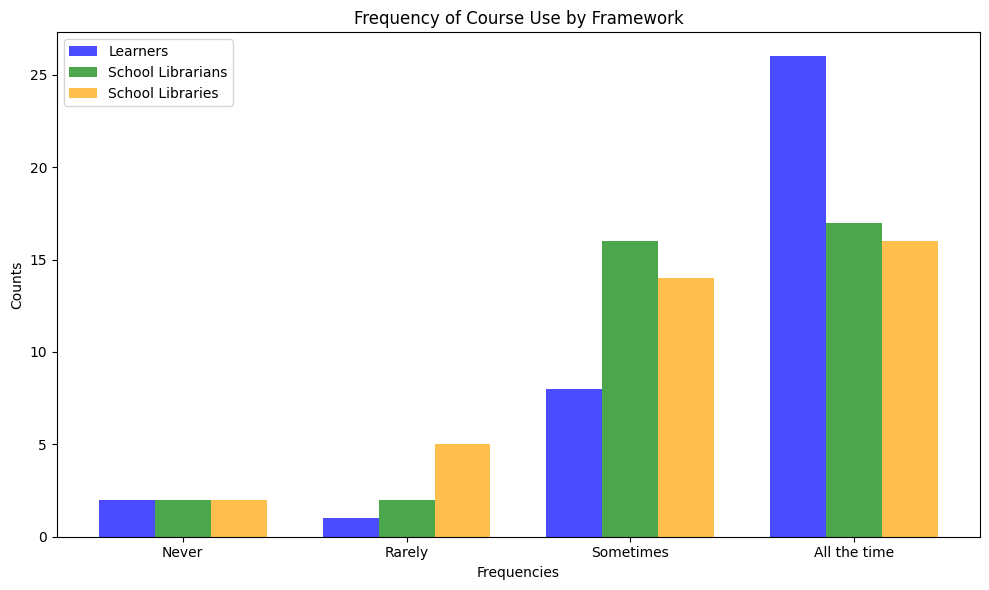

In [45]:
def plot_combined_bar_chart(df, cols, title, colors):
    """
    Combine multiple bar charts into one for the given columns of the dataframe.
    """
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    x = range(len(df[cols[0]].value_counts().sort_index().index))

    for i, (col, color) in enumerate(zip(cols, colors)):
        plt.bar(
            [pos + i * bar_width for pos in x],
            df[col].value_counts().sort_index().values,
            bar_width,
            label=col,
            color=color,
            alpha=0.7
        )

    plt.title(title)
    plt.xlabel('Frequencies')
    plt.ylabel('Counts')
    plt.xticks([pos + bar_width for pos in x], ['Never', 'Rarely', 'Sometimes', 'All the time'])
    plt.legend()
    plt.tight_layout()
    plt.show()

# Rename
df_e_q29_renamed = df_e_q29.rename(columns={
    'q29_for_learners': 'Learners',
    'q29_for_school_librarians': 'School Librarians',
    'q29_for_school_libraries': 'School Libraries'
})

# Combine three bar charts into one
plot_combined_bar_chart(
    df_e_q29_renamed,
    ['Learners', 'School Librarians', 'School Libraries'],
    'Frequency of Course Use by Framework',
    ['blue', 'green', 'orange']
)

- The Frameworks for learners was the most frequently used, with the majority of respondents (70%) selecting 'All the time'.

- School librarians and school libraries Frameworks had more balanced responses (all around 40%), with many selecting both 'All the time' and 'Sometimes'.

- Very few respondents chose 'Rarely' or 'Never' for any of the Frameworks, indicating overall regular use.

- Overall, educators appear to engage with all three Frameworks, though the learner-focused one stands out for its consistent and frequent use.

### Strength

`q18`: Overall, how would you rate the National School Library Standards?

In [46]:
value_counts = df_e.iloc[:, 30].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
result.sort_values(by='Count', ascending=False)

,Count,Percentage
q18_rate,,
Good,21,52.5
Excellent,16,40.0
Fair,3,7.5


- Generally, most respondents (92.5%) gave positive feedback, 40% of the 40 respondents rated the Standards as 'Excellent'.

- There are still 3 of them rated as 'Fair', but nobody chose 'Poor' here.

`q20`: With the book in mind, below is a list of words and phrases. Please rate how well you think each word or phrase describes the book publication National School Library Standards for Learners, School Librarians, and School Libraries.

In [47]:
df_e_q20.iloc[:, 1:].astype(float).mean()

q20_valuable              5.052632
q20_relevant              5.000000
q20_practical             4.105263
q20_useful                4.657895
q20_easy_to_use           3.973684
q20_easy_to_understand    4.052632
q20_well_written          4.657895
q20_nicely_designed       4.421053
q20_well_organized        4.789474
q20_ADA_accessible        3.605263
dtype: float64

In [48]:
counts = df_e_q20.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([6, 0], fill_value=0))
print(counts)

   q20_valuable  q20_relevant  q20_practical  q20_useful  q20_easy_to_use  \
6            17            14              7          10                6   
0             1             0              1           0                1   

   q20_easy_to_understand  q20_well_written  q20_nicely_designed  \
6                       6                11                    8   
0                       0                 0                    0   

   q20_well_organized  q20_ADA_accessible  
6                  13                   2  
0                   0                   2  


- The book received the highest average ratings for being 'Valuable' (5.05), 'Relevant' (5.00), and 'Well-organized' (4.79)—qualities that were also reinforced by the large number of respondents selecting the top rating of 6 (17, 14, and 13 respectively).

- Traits like 'Well-written' (4.66) and 'Useful' (4.66) also scored strongly, with 11 and 10 respondents rating them a 6, reflecting strong overall satisfaction with the content and tone.

- In contrast, attributes such as 'Easy to use' (3.97) and 'Practical' (4.11) received lower mean scores, with fewer top ratings (6 respondents and 7 respondents, respectively) and one lowest rating (0) each—suggesting room for improvement in usability and day-to-day application.

- The lowest rated descriptor was 'ADA accessible' (3.61), which also had the fewest 6-ratings (2) and the most 0-ratings (2), indicating concerns around accessibility and inclusive design.

- Respondents rated the book most highly for being valuable, relevant, and well-organized, while noting lower ratings for practicality, ease of use, and especially ADA accessibility, indicating strong overall appreciation with some concerns around usability and inclusiveness.

`q21`: What, if anything, do you LIKE about the National School Library Standards for Learners, School Librarians, and School Libraries book publication?

In [49]:
df_e_q21 = df_e.iloc[:, 42].dropna().tolist()
df_e_q21

['Opening chapters explaining the three frameworks  Chapters unpacking each of the Shared Foundations',
 'Comprehensive, professional, truly big  picture.  Forward thinking.  Acknowledgment of over-lapping components.',
 'I like the complete frameworks and how they cover school librarians, learners, and school libraries on the same topics. ',
 'The standards are delineated for students, the librarian, and the school library',
 'I love that the five roles of a school librarian are explicitly stated and defined. I also appreciate the compilation of valuable resources in the appendices.',
 'Having all the different standards in one book instead of multiple publications.',
 'inclusive language',
 'Wide coverage, sets a high bar',
 'details and inclusive',
 'I like the 4 domains the best. I think the 6 shared foundations are OK. I think you could just go with the 4 domains for the whole thing.',
 'These are the gold standard we aim our students towards',
 "I like the focus on students' inqu

In [50]:
# Combine all responses into a single string
all_responses = " ".join(df_e_q21)

# Clean the text: remove special characters, numbers, and convert to lowercase
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', all_responses).lower()

# Tokenize the text into words
words = cleaned_text.split()

# Remove common stopwords
stopwords = set([
    "the", "and", "to", "of", "in", "is", "it", "for", "that", "this", "with", "have", "book", "who", "feels", "librarian", 
    "on", "as", "are", "be", "or", "by", "an", "at", "not", "a", "but", "too", "standards", "need", "text", "each", 
    "has", "its", "they", "their", "can", "we", "you", "from", "more", "all", "there", "library", "get", "also", "one", 
    "many", "some", "so", "if", "my", "i", "students", "librarians", "school", "like", "just", "use", "make", "three"
])
filtered_words = [word for word in words if word not in stopwords]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Display the most common words
word_counts.most_common(20)

[('shared', 5),
 ('foundations', 4),
 ('chapters', 3),
 ('frameworks', 3),
 ('learners', 3),
 ('support', 3),
 ('comprehensive', 2),
 ('thinking', 2),
 ('libraries', 2),
 ('appendices', 2),
 ('different', 2),
 ('multiple', 2),
 ('inclusive', 2),
 ('wide', 2),
 ('domains', 2),
 ('think', 2),
 ('these', 2),
 ('inquiry', 2),
 ('content', 2),
 ('skills', 2)]

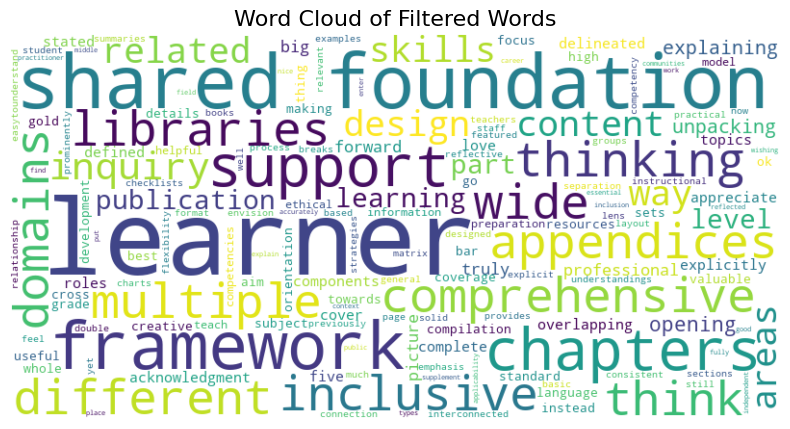

In [51]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Words', fontsize=16)
plt.show()

- Respondents consistently appreciated the book’s comprehensive coverage, with repeated mentions of the 'shared foundations', 'frameworks', and 'chapters' that clearly delineate standards for learners, school librarians, and school libraries.

- The book’s inclusive language, broad applicability, and forward-thinking design were valued for supporting multiple learning styles and diverse educational contexts—keywords like 'inclusive', 'different', and 'support' reinforce this praise.

- Tools such as appendices, charts, and checklists were also highlighted, and terms like 'thinking', 'skills', 'domains', and 'inquiry' suggest strong alignment with 21st-century learning goals.

- The standards’ ability to connect theory and practice while offering a clear instructional framework resonated with respondents, especially in helping students visualize roles, relationships, and responsibilities across the profession.

`q23`: Below is a list of words and phrases. Please rate how well you think each word or phrase describes the National School Library Standards.

In [52]:
df_e_q23.iloc[:, 1:].astype(float).mean()

q23_easy_to_explain      3.763158
q23_achievable           4.052632
q23_advocacy_tool        4.526316
q23_culture_change       4.368421
q23_collaboration        4.710526
q23_easy_to_implement    3.736842
dtype: float64

In [53]:
counts = df_e_q23.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([6, 0], fill_value=0))
print(counts)

   q23_easy_to_explain  q23_achievable  q23_advocacy_tool  q23_culture_change  \
6                    4               6                  8                   7   
0                    2               2                  0                   0   

   q23_collaboration  q23_easy_to_implement  
6                 11                      4  
0                  0                      1  


- 'Useful for collaboration' received the highest average rating (4.71) and the most top ratings (11 respondents chose 6), confirming strong alignment between the standards and collaborative work.

- Respondents also rated the standards highly as a 'Good advocacy tool' (4.53) and as 'Helps foster culture change' (4.37)—both praised without any respondents giving the lowest rating (0).

- 'Achievable' received a solid mean score (4.05) with 6 top ratings, though 2 respondents gave it a 0, suggesting it may not feel attainable for everyone depending on their setting.

- In contrast, 'Easy to explain' (3.76) and 'Easy to implement' (3.74) had the lowest average ratings, each with only 4 respondents selecting the highest score, and 'Easy to implement' received one of the few lowest possible ratings—highlighting a gap in clarity and accessibility.

`q24`: Please indicate to what degree you agree or disagree with each statement.

In [54]:
df_e_q24.iloc[:, 1:].astype(float).mean()

q24_library_community         1.605263
q24_education_community       1.263158
q24_develop_and_administer    1.763158
q24_supervisor                1.184211
q24_colleagues                0.184211
q24_college                   0.710526
q24_professionalism           1.789474
dtype: float64

In [55]:
counts = df_e_q24.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([2, -2], fill_value=0))
print(counts)

    q24_library_community  q24_education_community  \
 2                     25                       18   
-2                      0                        0   

    q24_develop_and_administer  q24_supervisor  q24_colleagues  q24_college  \
 2                          29              21              11           14   
-2                           0               2               8            5   

    q24_professionalism  
 2                   32  
-2                    0  


- Respondents showed strong agreement that the AASL Standards reinforce professionalism (mean: 1.79) and are essential for developing and administering a school library (1.76), with 32 and 29 respondents respectively selecting the highest agreement level (2).

- The standards were also widely seen as valuable to the library (1.61) and education (1.26) communities, with 25 and 18 respondents strongly agreeing and no one strongly disagreeing on either point.

- Awareness of the standards was high among supervisors (1.18) but mixed among colleagues, especially those outside the library field—only 11 strongly agreed that colleagues educating future administrators knew about the standards, and 8 strongly disagreed, resulting in a low overall mean of 0.18.

- Similarly, perceptions of departmental awareness were modest (mean: 0.71), with 5 respondents strongly disagreeing, suggesting limited diffusion of the standards beyond library-focused circles.

- Overall, respondents strongly affirmed the value and professional importance of the AASL Standards, though awareness appears to drop significantly outside the immediate library community.

`q28`: How well described do you feel each of the following are within the National School Library Standards for Learners, School Librarians, and School Libraries book? (Page numbers indicate locations within American English version of the book.)

In [56]:
df_e_q28.iloc[:, 1:].astype(float).mean()

q28_language                 1.060606
q28_structure                1.303030
q28_interdependent_nature    1.272727
q28_key_commitments          1.363636
q28_interrelated_aspects     1.181818
q28_continuum                0.909091
q28_context                  0.939394
dtype: float64

In [57]:
counts = df_e_q28.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([2, -2], fill_value=0))
print(counts)

    q28_language  q28_structure  q28_interdependent_nature  \
 2            10             19                         16   
-2             0              0                          0   

    q28_key_commitments  q28_interrelated_aspects  q28_continuum  q28_context  
 2                   18                        16             11           10  
-2                    0                         1              0            1  


- Respondents felt the Key Commitments of the Shared Foundations were the most clearly described (mean: 1.36), with 18 respondents rating them as “Very well”, reflecting strong clarity and understanding.

- Other elements that also stood out for clear description include the structure of the frameworks (1.30), the interdependent nature of the three frameworks (1.27), and the interrelated aspects of the Shared Foundations (1.18)—each receiving 16 or more top ratings.

- Concepts like the language of competency-based standards (1.06) and the context of competencies and alignments (0.94) received more modest average scores, with only 10 respondents selecting “Very well” and even one selecting “Not at all,” indicating possible gaps in clarity.

- The continuum of the learning domains (0.91) received the lowest mean score, suggesting it may be one of the more challenging components for readers to fully grasp, despite having no strong negative ratings.

- Overall, while most core structural and conceptual elements were viewed as well described, certain areas—especially those involving language and deeper contextual framing—may benefit from clearer explanation or guidance.

`q30`: How often do you consider each of the AASL Standards Shared Foundations in courses with your students?

In [58]:
df_e_q30.iloc[:, 1:].astype(float).mean()

q30_inquire        2.540541
q30_include        2.540541
q30_collaborate    2.513514
q30_curate         2.486486
q30_explore        2.513514
q30_engage         2.567568
dtype: float64

In [59]:
counts = df_e_q30.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([3, 0], fill_value=0))
print(counts)

   q30_inquire  q30_include  q30_collaborate  q30_curate  q30_explore  \
3           23           25               25          23           22   
0            1            2                2           2            1   

   q30_engage  
3          24  
0           1  


- Cannot see significant differences from these aspects. Gnerally frequently considered but without valuable findings.

`q31`: How often do you consider each of the AASL Standards Domains in courses with your students?

In [60]:
df_e_q31.iloc[:, 1:].astype(float).mean()

q31_think     2.378378
q31_create    2.351351
q31_share     2.378378
q31_grow      2.378378
dtype: float64

In [61]:
counts = df_e_q31.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([3, 0], fill_value=0))
print(counts)

   q31_think  q31_create  q31_share  q31_grow
3         21          20         21        20
0          2           2          2         2


- Cannot see significant differences from these aspects. Gnerally frequently considered but without valuable findings.

`q32`: How helpful do you find the National School Library Standards for discussing each of the following concepts with students?

In [62]:
df_e_q32.iloc[:, 1:].astype(float).mean()

q32_lesson_preparation_and_assessment             0.945946
q32_librarian_evaluation                          0.891892
q32_with_other_educators                          0.891892
q32_with_other_libraries                          0.027027
q32_demonstrate_success                           0.594595
q32_guide_instructional_priorities                1.135135
q32_develop_curriculum                            1.270270
q32_shape_school_library                          1.378378
q32_meet_national_standards                       1.108108
q32_advocate_for_school_library                   1.243243
q32_advocate_for_learners                         1.216216
q32_increase_understanding_of_school_librarian    1.513514
q32_educate_preservice_librarians                 1.324324
q32_legitimize_profession                         1.270270
dtype: float64

In [63]:
counts = df_e_q32.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([2, 1, 0, -1, -2], fill_value=0))
print(counts)

    q32_lesson_preparation_and_assessment  q32_librarian_evaluation  \
 2                                     17                        12   
 1                                     11                        17   
 0                                      1                         1   
-1                                      6                         6   
-2                                      2                         1   

    q32_with_other_educators  q32_with_other_libraries  \
 2                        13                         6   
 1                        16                        12   
 0                         1                         1   
-1                         5                        13   
-2                         2                         5   

    q32_demonstrate_success  q32_guide_instructional_priorities  \
 2                        9                                  18   
 1                       17                                  13   
 0                     

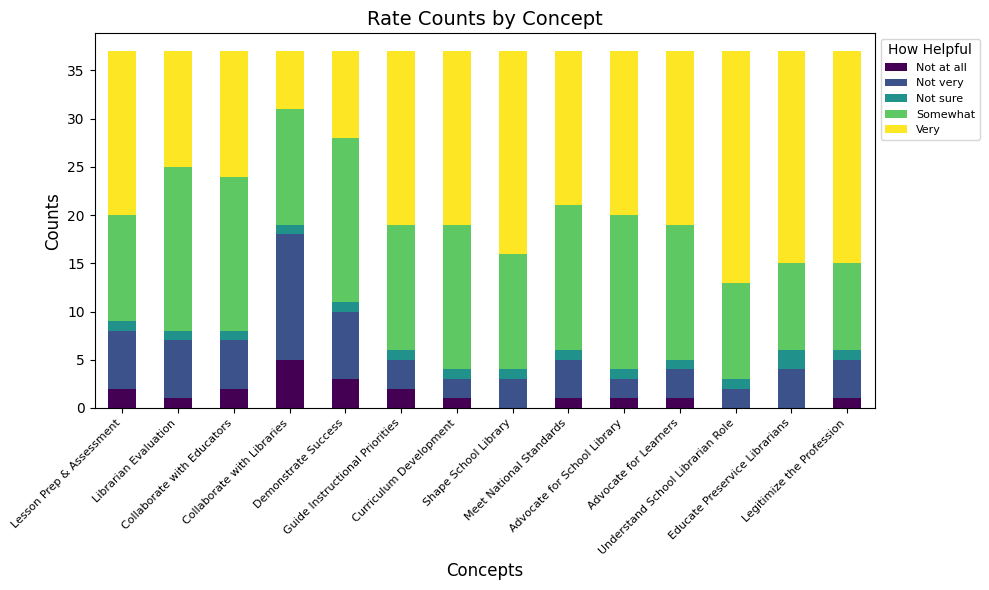

In [64]:
counts = df_e_q32.iloc[:, 1:].apply(lambda col: col.value_counts().reindex(range(-2, 3), fill_value=0))

# Rename
counts = counts.rename(columns={
    'q32_lesson_preparation_and_assessment': 'Lesson Prep & Assessment',
    'q32_librarian_evaluation': 'Librarian Evaluation',
    'q32_with_other_educators': 'Collaborate with Educators',
    'q32_with_other_libraries': 'Collaborate with Libraries',
    'q32_demonstrate_success': 'Demonstrate Success',
    'q32_guide_instructional_priorities': 'Guide Instructional Priorities',
    'q32_develop_curriculum': 'Curriculum Development',
    'q32_shape_school_library': 'Shape School Library',
    'q32_meet_national_standards': 'Meet National Standards',
    'q32_advocate_for_school_library': 'Advocate for School Library',
    'q32_advocate_for_learners': 'Advocate for Learners',
    'q32_increase_understanding_of_school_librarian': 'Understand School Librarian Role',
    'q32_educate_preservice_librarians': 'Educate Preservice Librarians',
    'q32_legitimize_profession': 'Legitimize the Profession'
})
legend_labels = ['Not at all', 'Not very', 'Not sure', 'Somewhat', 'Very']

counts.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Rate Counts by Concept', fontsize=14)
plt.xlabel('Concepts', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(title='How Helpful', labels=legend_labels, bbox_to_anchor=(1, 1), fontsize=8)
plt.tight_layout()
plt.show()

- Respondents found the standards most helpful for increasing understanding of the school librarian’s role (mean: 1.51), with 24 respondents rating it as 'Very helpful', showing its strong value in advocacy and identity-building.

- High mean scores also appeared for shaping the school library (1.38), educating pre-service school librarians (1.32), and legitimizing the profession (1.27)—each with 21–22 'Very helpful' ratings, reinforcing the standards' strength in professional development and system-level conversations.

- The standards were also rated highly for developing curriculum (1.27) and advocating on behalf of learners (1.22), with 18+ top ratings, indicating broad support in instructional contexts as well.

- At the other end of the spectrum, 'Engaging with other libraries' had the lowest mean score (0.03) and the most negative ratings (5 rated it as 'Not at all helpful'), suggesting a weak perceived connection between the standards and external library collaboration.

- Other relatively low-scoring items included 'Demonstrating success to others' (0.59) and 'Lesson preparation and assessment' (0.95), both showing a small number of low ratings and fewer strong endorsements.

- Overall, the standards are seen as highly helpful in reinforcing the professional role of school librarians and guiding instructional planning, while their utility appears more limited when it comes to interlibrary collaboration and broader performance demonstration.

`q38`: Overall, how would you rate AASL’s initiative and efforts since the launch of the National School Library Standards and available supporting resources?

In [65]:
value_counts = df_e.iloc[:, 153].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})
result.sort_values(by='Count', ascending=False)

,Count,Percentage
q38_rate_support_materials,,
Good,23,63.888889
Excellent,8,22.222222
Fair,5,13.888889


- Generally, most respondents (86%) gave positive feedback, but only 22% of the 36 respondents rated the Standards as 'Excellent'.

- There are still 5 of them rated as 'Fair', but nobody chose 'Poor' here.

### Challenge

`q15`: Why do you not require the National School Library Standards as a textbook for your program or course?

In [66]:
df_e_q15 = df_e.iloc[:, 20].dropna().tolist()
df_e_q15

['The book is expensive. I encourage students to buy it.',
 'Cost',
 "I'm an adjunct at this moment.  I'm also a Professor emeritus and used it in my previous program.",
 'Cost ',
 "It's cost prohibitive. We assign course readings that are articles or book chapters that are available through library databases, as well as articles posted for open access, such as free selections from Knowledge Quest or the KQ Blog.",
 'It is too expensive for my students to purchase.',
 "I don't teach that class.",
 'We try to be as cost effective as we can for our students and do not require any text purchases for our core courses.',
 'Cost',
 "It's too expensive! Our program is designed to use exclusively OERs so our students are not required to purchase any texts. It is a CRIME that we charge so much for our standards when NextGen, CCSS, and C3 are available for free!",
 'Online access',
 '$$']

- The most commonly cited challenge was cost—multiple respondents shared concerns about the price of the book and expressed a desire to minimize expenses for students.

- As a result, some educators choose to use alternative approaches, such as integrating content from the standards into course materials or readings instead of requiring the full textbook.

`q19`: For what reason did you give that rating? Please explain your thinking.

In [67]:
df_e_q19 = df_e.iloc[:, 31].dropna().tolist()
df_e_q19

['Many standards are vague; the standards for school libraries and librarians neglect many important elements; the parallels among the three standards (student, librarian, and libraries) are not necessary. A university educator and school librarian should not have to purchase the accompanying Shared Foundation Series to explain the standards.',
 'The book is overkill with lots of useless content',
 'little on reading, little on management, too long on its development and on personae']

- Respondents expressed concerns about the standards being vague, overly lengthy, and lacking in practical focus, particularly criticizing the excess of unnecessary content and insufficient coverage of key areas like reading and management.

`q22`: What, if anything, do you dislike or find challenging about the National School Library Standards for Learners, School Librarians, and School Libraries book publication?

In [68]:
df_e_q22 = df_e.iloc[:, 43].dropna().tolist()
df_e_q22

['Assessment chapters are the weakest chapters in the text.  It would be helpful if more administrative/management/collection development content was included in the Librarians and Libraries frameworks and chapters.',
 'Overwhelming for students.  Too abstract for many students.  Not realistic for too many schools and districts.  Insufficient consideration of struggling programs.  Lack of attention to modified standards for special needs populations.  Greater need for imbedded concrete examples throughout.',
 'The price of the book has made the standards inaccessible to many students and practitioners, so all the work in the standards is not reaching its audience.',
 'The book is text dense, difficult to read, and is can be confusing for pre-service librarians.',
 'The cost is a challenge if we want to make this information accessible to the field. There was a lot of repetition in the book. The standards framework is hard to explain to those outside the profession (they are expecting s

In [69]:
# Combine all responses into a single string
all_responses = " ".join(df_e_q22)

# Clean the text: remove special characters, numbers, and convert to lowercase
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', all_responses).lower()

# Tokenize the text into words
words = cleaned_text.split()

# Remove common stopwords
stopwords = set([
    "the", "and", "to", "of", "in", "is", "it", "for", "that", "this", "with", "have", "book", "who", "feels",
    "on", "as", "are", "be", "or", "by", "an", "at", "not", "a", "but", "too", "standards", "need", "text", 
    "has", "its", "they", "their", "can", "we", "you", "from", "more", "all", "there", "library", "get", 
    "many", "some", "so", "if", "my", "i", "students", "librarians", "school", "like", "just", "use", "make"
])
filtered_words = [word for word in words if word not in stopwords]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Display the most common words
word_counts.most_common(20)

[('price', 5),
 ('information', 5),
 ('shared', 5),
 ('another', 5),
 ('chapters', 4),
 ('hard', 4),
 ('foundations', 4),
 ('competencies', 4),
 ('development', 3),
 ('frameworks', 3),
 ('overwhelming', 3),
 ('work', 3),
 ('field', 3),
 ('lot', 3),
 ('framework', 3),
 ('should', 3),
 ('understand', 3),
 ('makes', 3),
 ('practical', 3),
 ('inquire', 3)]

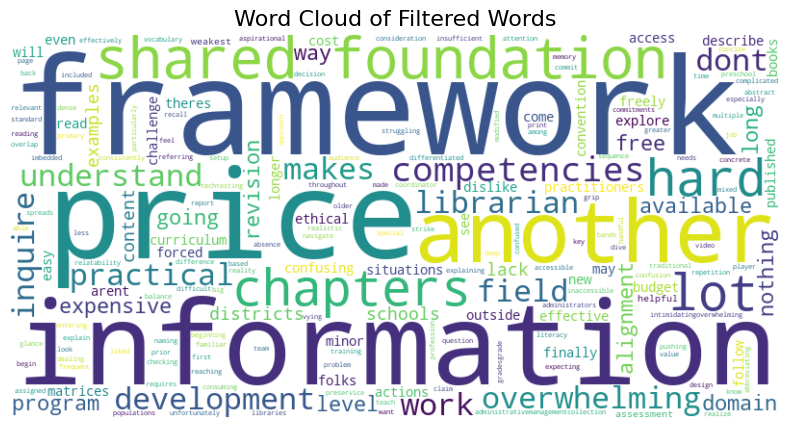

In [70]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Filtered Words', fontsize=16)
plt.show()

- The cost of the book stood out as the most frequently mentioned challenge, as 'price' was the most common word. Respondents emphasized that the standards should be more accessible and freely available to ensure broader adoption.

- Terms like 'framework', 'information', 'shared', 'chapters' and 'foundations' appeared frequently, pointing to concerns about the structure, density, and organization of the book. Many respondents found it hard to navigate, overly detailed, and confusing for students and new users.

- The word 'overwhelming' appeared multiple times, reflecting how the volume and complexity of the content can make the standards difficult to implement without extensive support or training.

- Respondents noted a lack of emphasis on practical topics such as reading, management, and real-world application, especially for diverse or under-resourced school environments. The word 'practical' reinforces this request for more usable content.

- Words like 'work', 'understand', 'inquire', and 'competencies' highlight a broader challenge. While the standards are ambitious, many find them difficult to interpret and apply without clearer examples or support materials.

`q35`: What, if anything, are the biggest challenges in implementing the National School Library Standards for Learners, School Librarians, and School Libraries? Select all that apply.

In [71]:
df_e_q35 = df_e.iloc[:, 121:132]
counts = df_e_q35.sum()
percentages = (counts / 37) * 100

result = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
})

result.sort_values(by='Count', ascending=False, inplace=True)
result

,Count,Percentage
q35_lack_time_for_collaboration,21,56.756757
q35_lack_support,18,48.648649
q35_translate_standards,16,43.243243
q35_adapt_standards,14,37.837838
q35_success_for_learners,14,37.837838
q35_lack_time_to_study,13,35.135135
q35_implement_standards,12,32.432432
q35_success_for_school_libraries,12,32.432432
q35_success_for_school_librarians,11,29.72973
q35_demonstrate_alignment,9,24.324324


In [72]:
df_e.iloc[:, 132].dropna().tolist()

['Cost of the standards text',
 'You should have a none of the above response here.',
 'Our state does not recognize the national standards. This makes it hard to gain buy in from our State Education Department.',
 'Difficulty of separating school librarians and school libraries since the school librarian is often responsible for both standards. ',
 'related to translating standards into lesson plans which then also impacts measurement, it would be really helpful for the standards to be translated for grade bands',
 'Our program is based on the ALA-AASL-CAEP standards which is geared toward what future school librarians need to know. There is no connection between the set of standards.',
 'The cost of the book and the fact that it is not available in digital format are the two biggest barriers to use. Universities are working to reduce barriers to students by using Open Educational Resources and making digital library texts available. Most school library candidates will not realize any

- The most common challenge was lack of time for collaboration (57%), followed by lack of support from others (49%), highlighting structural barriers to implementation.

- Translating the standards into lesson plans (43%) and adapting them to local curriculum (38%) were frequently cited instructional hurdles.

- Many respondents also struggled with measuring success, especially for learners, school librarians, and libraries.

- Open-ended responses emphasized the high cost of the book and its lack of a digital or freely accessible format as major barriers.

- Some respondents noted misalignment with state or program standards and a need for grade-level differentiation to make the standards more practical.

`q39`: For what reason did you give that rating? Please explain your thinking.

In [73]:
df_e_q39 = df_e.iloc[:, 154].dropna().tolist()
df_e_q39

['Efforts often fail to reach school librarians working in isolation who receive no release time or support for conference attendance.  The neediest recipients have limited opportunities (many can’t even afford a paper copy  of the standards).  AASL needs to establish an Implementation pathway that prioritizes actions through small, achievable , actionable steps.',
 "The standards are confusing and disjointed. While they allow for flexibility in when and how they are implemented, this leads to inconsistencies. The shared foundation of engage is named incorrectly. The domains don't help in aiding the progression of competencies. I appreciate the intent of the common beliefs, but I prefer ALA's core values.",
 'The cost of the book for preservice students is prohibitive and does not encourage them to purchase and use the standards.  ',
 "Its all about access.  Standards can't be implemented if they can't be access.  The cost is a huge barrier to that access.  The group that has implement

- Respondents emphasized that cost and limited access to the standards—especially for preservice librarians—are major barriers to implementation.

- They also noted that librarians working in isolation often lack time, support, or opportunities for professional development tied to the standards.

- Some found the structure and terminology of the standards confusing, calling for clearer implementation tools and broader, free availability.

### Suggestion

`q33`: When you consider your role as an educator of school librarians, is there anything new that could be included within the National School Library Standards for Learners, School Librarians, and School Libraries book publication?

In [74]:
df_e_q33 = df_e.iloc[:, 119].dropna().tolist()
df_e_q33

['*Fuller chapters on assessment of learners and librarian and evaluation of library  *Additional information/chapters on collection development/library administration',
 'The impact of AI.  Leadership roles outside of the library track (district committees, community partnerships, ),',
 'No.',
 'More information on intellectual freedom, generative AI and ethical use of information. ',
 "I think the Position Statement on the School Librarians Role in Reading is well done, but it's too bad that that same type of message is more visible/discernable in the standards",
 'More focus on intellectual freedom',
 'The intellectual virtues seem to align very well with the standards and may be worth mentioning.',
 "More emphasis on integration of digital skills and engagement online in research-related domains but also in engaging with civility and compassion towards peers, understanding privacy of one's data and digital footprints, and safe choices and behaviors generally",
 'Yes. While not new,

- Many respondents called for expanded content on critical topics like assessment (of learners, librarians, and libraries), collection development, library administration, and curriculum integration.

- Emerging and evolving issues such as AI, intellectual freedom, ethical information use, and digital citizenship were repeatedly mentioned, with suggestions to address them more explicitly and keep the standards responsive to technological change.

- Several responses emphasized the need to clarify and elevate the school librarian’s role—with calls to better distinguish between student and librarian standards, reinforce the librarian’s instructional, literacy, and leadership roles, and align those clearly with student competencies.

- Others recommended adding grade-level guidance (elementary, middle, high school) to help contextualize expectations, and providing practical tools like lesson plan models, mini-posters, or examples of implementation at different levels.

- A few respondents highlighted the opportunity for AASL to connect more deeply with preservice librarians, suggesting more targeted outreach, training sessions, and transparency about how AASL supports the profession and uses its resources.

`q34`: How do you use the National School Library Standards or any of the supporting materials from AASL to advocate for learners, school librarians, and school libraries?

In [75]:
df_e_q34 = df_e.iloc[:, 120].dropna().tolist()
df_e_q34

['Supporting materials on the standards.aasl.org website are very helpful:  one pagers, administrator videos, etc.',
 'Classroom teachers, administrators, and educators in general are unaware that national library standards exist.  Sharing the standards can be extremely helpful.',
 'The answer to this question was covered by my responses to previous questions. ',
 'To support the role of school librarians in academic progress. To demonstrate the value added by the school librarian relative to research and information literacy. ',
 'The standards help validate the instructional role that school librarians have. The framework is useful as an advocacy tool to show the range of teaching that takes place in a school library.',
 "I honestly don't",
 'Learning experiences',
 'I include them in the course content.',
 "Demonstrating the collaborative orientation of a school librarian's work and the alignment to school-level activities and priorities.",
 'I do not use any of the supporting mater

- Many respondents use the standards directly in their teaching, incorporating them into lesson planning, curriculum design, strategic planning, and student instruction to help future librarians advocate effectively within their schools.

- Some respondents highlight the framework’s value in validating the librarian’s instructional role and as a talking point for demonstrating impact to administrators and other educators.

- AASL’s supporting materials (e.g., one-pagers, videos, graphics, and crosswalks) were appreciated for their clarity and utility in advocacy, though a few noted limited access due to cost or lack of digital availability.

- A number of educators use the standards as a required textbook or a foundation for professional vocabulary, helping preservice librarians internalize the language and expectations of the field.

`q36`: What, if anything, have you done to help overcome challenges in implementing the National School Library Standards for Learners, School Librarians, and School Libraries? Select all that apply.

In [76]:
df_e_q36 = df_e.iloc[:, 133:140]
counts = df_e_q36.sum()
percentages = (counts / 37) * 100

result = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
})

result.sort_values(by='Count', ascending=False, inplace=True)
result

,Count,Percentage
q36_professional_learning,26,70.27027
q36_incorporate_standards,23,62.162162
q36_invest_time_to_study,22,59.459459
q36_advocate_the_importance,21,56.756757
q36_refine_new_courses,17,45.945946
q36_develop_tools,13,35.135135
q36_teach_colleagues,9,24.324324


In [77]:
df_e.iloc[:, 140].dropna().tolist()

['You should have a none of the above response here.',
 'served on a committee to adapt the standards for our state',
 "I created a crosswalk between AASL's and my state's school library standards",
 'Taught the standards']

- The most common actions were attending professional learning opportunities (70%) and adapting existing courses to incorporate the standards (62%), showing strong efforts toward integration and growth.

- Over half of respondents reported studying the standards and advocating for their importance, signaling a commitment to both implementation and awareness-building.

- Nearly half have collaborated with others to revise programs, while over a third have developed new tools to support alignment.

- Open-ended responses highlighted state-level engagement, including serving on committees, creating crosswalks with state standards, and teaching the standards directly.

`q41`: What additional supports would have been helpful to you when you first encountered the AASL Standards?

In [78]:
df_e_q41 = df_e.iloc[:, 156].dropna().tolist()
df_e_q41

['Simple, accessible guidelines.    Simple overviews.  Simple, straightforward, step - by- step visuals and  checklists.  Not overwhelming matrices and onslaughts of information.',
 'additional training on implementation. virtual training opportunities for lesson planning using standards. ',
 'The rollout of these standards felt very gimmicky.  I would love to see real depth in the development, rollout, and implementation of the standards.',
 'Specific support for preparation programs on how to use the standards in their courses',
 'Immediate professional development',
 'Workshops at AASL conferences',
 'The cheaper price for students is good, but open access is better.',
 'Better access to the publications for pre-service librarians',
 'I do not need support. The standards for school librarians and libraries are weak and need a major rewrite.',
 'Knowing who to contact at AASL that can help with the standards- honestly, that would be amazing.  Knowing who the education chair is for AA

In [79]:
# Combine all responses into a single string
all_responses = " ".join(df_e_q41)

# Clean the text: remove special characters, numbers, and convert to lowercase
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', all_responses).lower()

# Tokenize the text into words
words = cleaned_text.split()

# Remove common stopwords
stopwords = set([
    "the", "and", "to", "of", "in", "is", "it", "for", "that", "this", "with", "have", "book", "who", "feels", "librarian", "was", "into", 
    "on", "as", "are", "be", "or", "by", "an", "at", "not", "a", "but", "too", "standards", "need", "text", "each", "would", "them", "could", 
    "has", "its", "they", "their", "can", "we", "you", "from", "more", "all", "there", "library", "get", "also", "one", "aasl", "been", 
    "many", "some", "so", "if", "my", "i", "students", "librarians", "school", "like", "just", "use", "make", "three", "how"
])
filtered_words = [word for word in words if word not in stopwords]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Display the most common words
word_counts.most_common(20)

[('simple', 4),
 ('lesson', 4),
 ('access', 4),
 ('language', 4),
 ('objectives', 4),
 ('development', 3),
 ('specific', 3),
 ('support', 3),
 ('help', 3),
 ('cost', 3),
 ('academic', 3),
 ('learning', 3),
 ('strategies', 3),
 ('examples', 3),
 ('accessible', 2),
 ('step', 2),
 ('overwhelming', 2),
 ('training', 2),
 ('implementation', 2),
 ('opportunities', 2)]

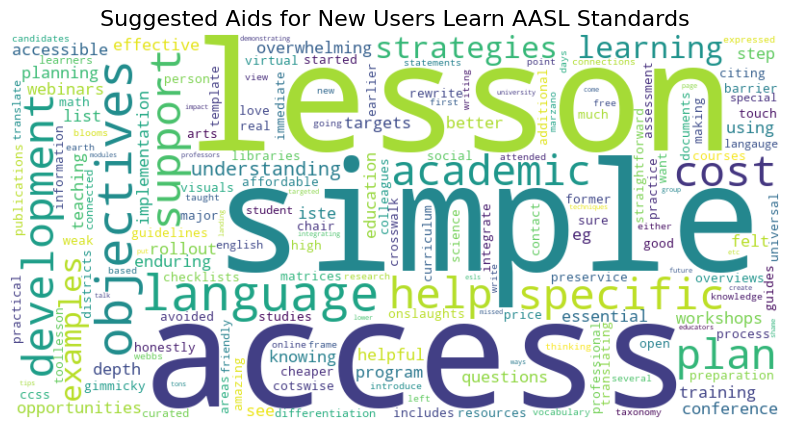

In [80]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(" ".join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Suggested Aids for New Users Learn AASL Standards', fontsize=16)
plt.show()

- Many respondents wished for simplified, step-by-step resources, including visual guides, checklists, and planning templates to ease the overwhelming nature of the matrices and content-heavy rollout.

- There was strong demand for early and ongoing professional development, especially virtual trainings, webinars, conference workshops, and implementation-focused modules tailored to preparation programs.

- Cost and access barriers were a major concern—multiple responses called for open-access versions or more affordable pricing, particularly for preservice students and remote educators.

- Respondents also expressed a desire for clearer connections to academic standards (e.g., ISTE, CCSS) and direct communication channels with AASL leadership or support staff for guidance and collaboration.

### With Librarians

`q16`: How do your students access the National School Library Standards? Select all that apply.

In [81]:
df_e_q16 = df_e.iloc[:, 21:28]
counts = df_e_q16.sum()
percentages = (counts / 38) * 100

result = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
})

result.sort_values(by='Count', ascending=False, inplace=True)
result

,Count,Percentage
q16_discount,25,65.789474
q16_web_portal,24,63.157895
q16_collage_library,14,36.842105
q16_poster,9,23.684211
q16_full_cost,7,18.421053
q16_loan_copies,2,5.263158
q16_provide_copies,0,0.0


In [82]:
df_e.iloc[:, 28].dropna().tolist()

["I'm sure it is in the coursework for the programs I teach in.",
 'I think some avoid purchasing by borrowing, using pieces they find online, and using the copy that is purchased in their school districts.']

- The most common method was through AASL’s student discount, with 66% of respondents reporting their students purchase the book this way.

- 63% said their students use the downloadable framework and materials available on the AASL web portal, showing strong use of free online resources.

- 37% indicated access through their college or university library, while 24% said students use the AASL Standards Frameworks poster.

- Only 18% said students buy the book at full cost, and very few (5%) reported loan programs or institutional provision of copies, pointing to a general lack of centralized access support.

- Open-ended comments revealed that some students rely on borrowing, digital fragments, or district-purchased copies, suggesting that access often requires workarounds and piecing together resources.

`q25`: Please state how much you agree or disagree with each of the following Common Beliefs of the school library profession.

In [83]:
df_e_q25.iloc[:, 1:].astype(float).mean()

q25_unique_and_essential    1.973684
q25_effective               1.921053
q25_prepared                1.973684
q25_reading                 1.921053
q25_intellectual_freedom    1.947368
q25_equitably_available     1.947368
dtype: float64

In [84]:
counts = df_e_q25.iloc[:, 1:].apply(lambda col: col.value_counts().reindex([2, -2], fill_value=0))
print(counts)

    q25_unique_and_essential  q25_effective  q25_prepared  q25_reading  \
 2                        37             35            37           35   
-2                         0              0             0            0   

    q25_intellectual_freedom  q25_equitably_available  
 2                        36                       36  
-2                         0                        0  


- Cannot see significant differences from these aspects. Gnerally agreed but without valuable findings.